# 🏗️ Building Permit Analysis - March 2025

This analysis uses data from the U.S. Census Bureau to explore the number of residential building permits issued in each U.S. state in March 2025.

### Goals:
- Identify top and bottom performing states
- Visualize permit trends
- Calculate each state's share of total permits


In [2]:
!pip install xlrd

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file (old .xls format) and skip metadata rows
df = pd.read_excel("statemonthly_202503.xls", skiprows=10)

# Select and rename columns
df = df[['Unnamed: 0', 'Unnamed: 13']]
df.columns = ['State', 'Total']

# Clean: remove regional summaries
df = df[df['State'].notnull()]
df = df[~df['State'].str.contains('Region|Division|United States', na=False)]

# Convert to numeric
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df = df.dropna(subset=['Total'])

# Add % share column
df['Share_%'] = (df['Total'] / df['Total'].sum()) * 100

# Preview data
df.head()


,State,Total,Share_%
2,Connecticut,27.0,0.633060
3,Maine,28.0,0.656506
4,Massachusetts,106.0,2.485346
5,New Hampshire,13.0,0.304807
6,Rhode Island,4.0,0.093787


In [5]:
total_us = df['Total'].sum()
print(f"🏢 Total permits issued nationwide in March 2025: {int(total_us):,}")


🏢 Total permits issued nationwide in March 2025: 4,265


In [6]:
top_states = df.sort_values(by='Total', ascending=False).head(10)
top_states


,State,Total,Share_%
35,Florida,547.0,12.825322
53,Texas,469.0,10.996483
68,California,324.0,7.596717
10,New Jersey,261.0,6.119578
36,Georgia,245.0,5.744431
38,North Carolina,189.0,4.431419
47,Tennessee,150.0,3.516999
11,New York,147.0,3.446659
19,Ohio,139.0,3.259086
39,South Carolina,112.0,2.626026


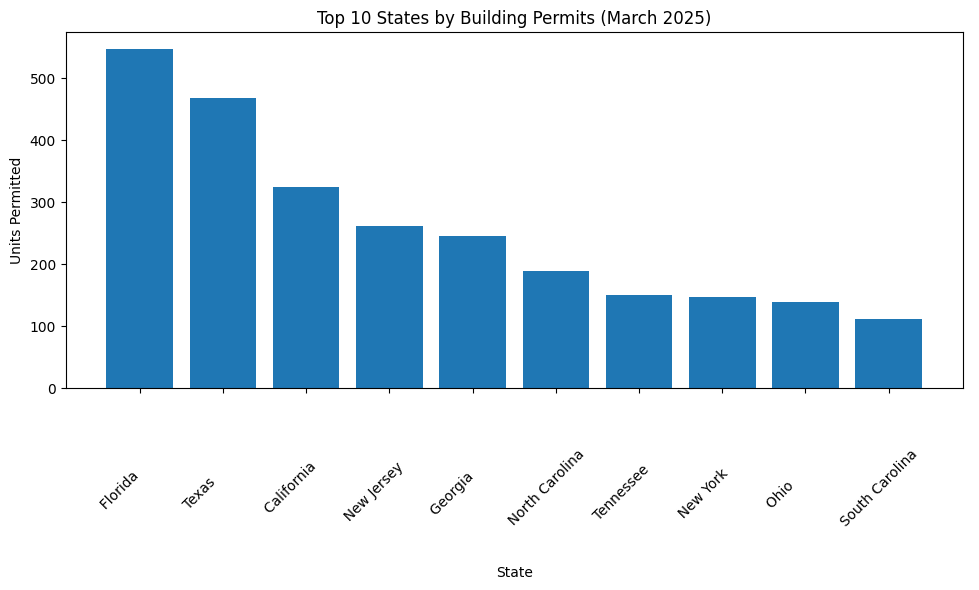

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(top_states['State'], top_states['Total'])
plt.title("Top 10 States by Building Permits (March 2025)")
plt.xlabel("State")
plt.ylabel("Units Permitted")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
bottom_states = df.sort_values(by='Total').head(10)
bottom_states


,State,Total,Share_%
64,Wyoming,1.0,0.023447
28,North Dakota,2.0,0.046893
67,Alaska,3.0,0.070340
6,Rhode Island,4.0,0.093787
34,District of Columbia,4.0,0.093787
69,Hawaii,5.0,0.117233
41,West Virginia,7.0,0.164127
7,Vermont,8.0,0.187573
51,Louisiana,8.0,0.187573
62,New Mexico,9.0,0.211020


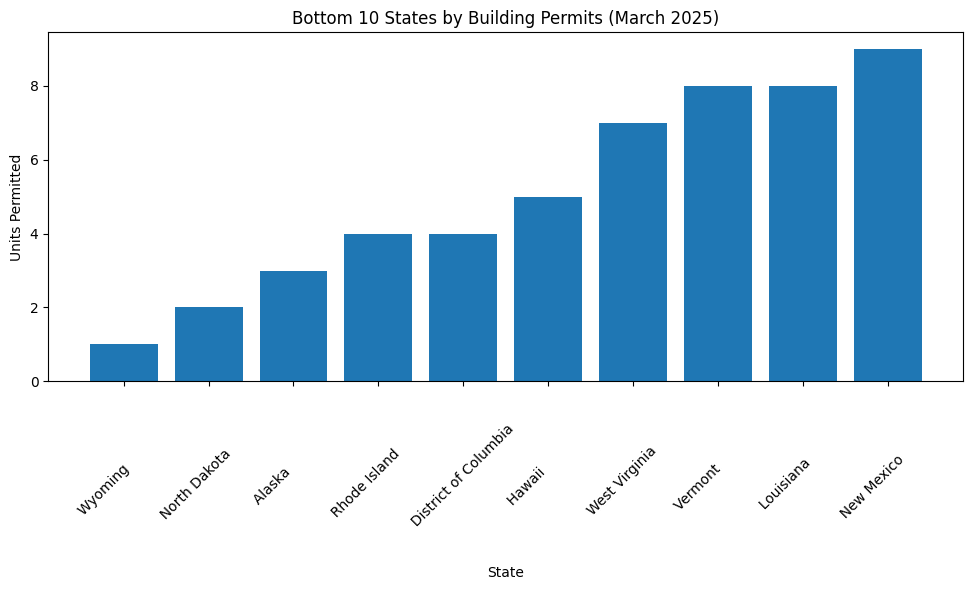

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(bottom_states['State'], bottom_states['Total'])
plt.title("Bottom 10 States by Building Permits (March 2025)")
plt.xlabel("State")
plt.ylabel("Units Permitted")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
df.to_csv("march_2025_permit_insights.csv", index=False)
print("✅ Data exported to 'march_2025_permit_insights.csv'")


✅ Data exported to 'march_2025_permit_insights.csv'


## 🧾 Summary & Insights

This analysis of March 2025 building permit data reveals key trends in residential construction activity across the U.S.:

- 🏆 **Top-performing states** like Texas, Florida, and California accounted for a significant share of national permits, signaling strong housing demand and development.
- 💤 **Bottom 10 states** issued significantly fewer permits, which may reflect population trends, seasonal effects, or local economic conditions.
- 📊 **State-level share of total permits** provides a useful benchmark for comparing construction intensity.

### 🔍 Business Relevance
For a commercial real estate data platform like **LightBox**, this type of analysis helps:
- Identify hot zones for investment, construction, or lending
- Benchmark growth across regions
- Power dashboards for clients such as developers, banks, and REITs

---

_This notebook can be extended by analyzing trends across multiple months or merging with real estate prices, demographics, or zoning datasets for deeper insight._
